In [1]:
import os
os.environ["KAGGLE_USERNAME"] = "gaurikagupta03"
os.environ["KAGGLE_KEY"]="67a7cbb040796f5b383bbcae1f6c69ac"
!kaggle datasets download -d muhammadardiputra/potato-leaf-disease-dataset

 28% 7.00M/25.2M [00:00<00:00, 73.1MB/s]
100% 25.2M/25.2M [00:00<00:00, 144MB/s] 


In [2]:
!pip install tensorflow-datasets

In [3]:
!unzip potato-leaf-disease-dataset.zip

Archive:  potato-leaf-disease-dataset.zip
  inflating: Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: Potato/Test/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG  
  inflating: Potato/Test/Potato___Early_blight/0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG  
  inflating: Potato/Test/Potato___Early_blight/07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG  
  inflating: Potato/Test/Potato___Early_blight/08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG  
  inflating: Potato/Test/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG  
  inflating: Potato/Test/Potato___Early_blight/08392b44-ecc6-4f38-8566-361b552cfe21___RS_Early.B 7393.JPG  
  inflating: Potato/Test/Potato___Early_blight/107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG  
  inflating: Potato/Test/Potato___Early_blight/109730cd-03f3-4139-a464-5f9151483e8c___RS_Early

In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path1="/content/Potato/Train"

In [6]:
image_size=256

In [7]:
data= tf.keras.preprocessing.image_dataset_from_directory(path1,shuffle=True,image_size=(image_size,image_size),batch_size=32)

Found 900 files belonging to 3 classes.


In [8]:
class_name = data.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
for x in class_name:
  length_of_class = len(x)
  print("==============================================")
  print(f"Length of {x}: {length_of_class}")

Length of Potato___Early_blight: 21
Length of Potato___Late_blight: 20
Length of Potato___healthy: 16


In [10]:
len(data) # number of batches in your dataset

29

In [11]:
"""total = tf.data.experimental.cardinality(data).numpy() # total number of images in dataset considering all batches
print(total)"""

'total = tf.data.experimental.cardinality(data).numpy() # total number of images in dataset considering all batches\nprint(total)'

In [12]:
for image,label in data.take(1):  # to create a new dataset that takes a specified number of elements from the beginning of the original dataset, taking one batch of dataset at a time for testing purposes
  print(image.shape)
  print(label.numpy()) # tensor to numpy array

(32, 256, 256, 3)
[2 0 1 0 1 0 2 0 2 2 1 1 2 2 1 2 0 2 1 2 2 2 0 1 0 2 1 1 2 0 0 2]


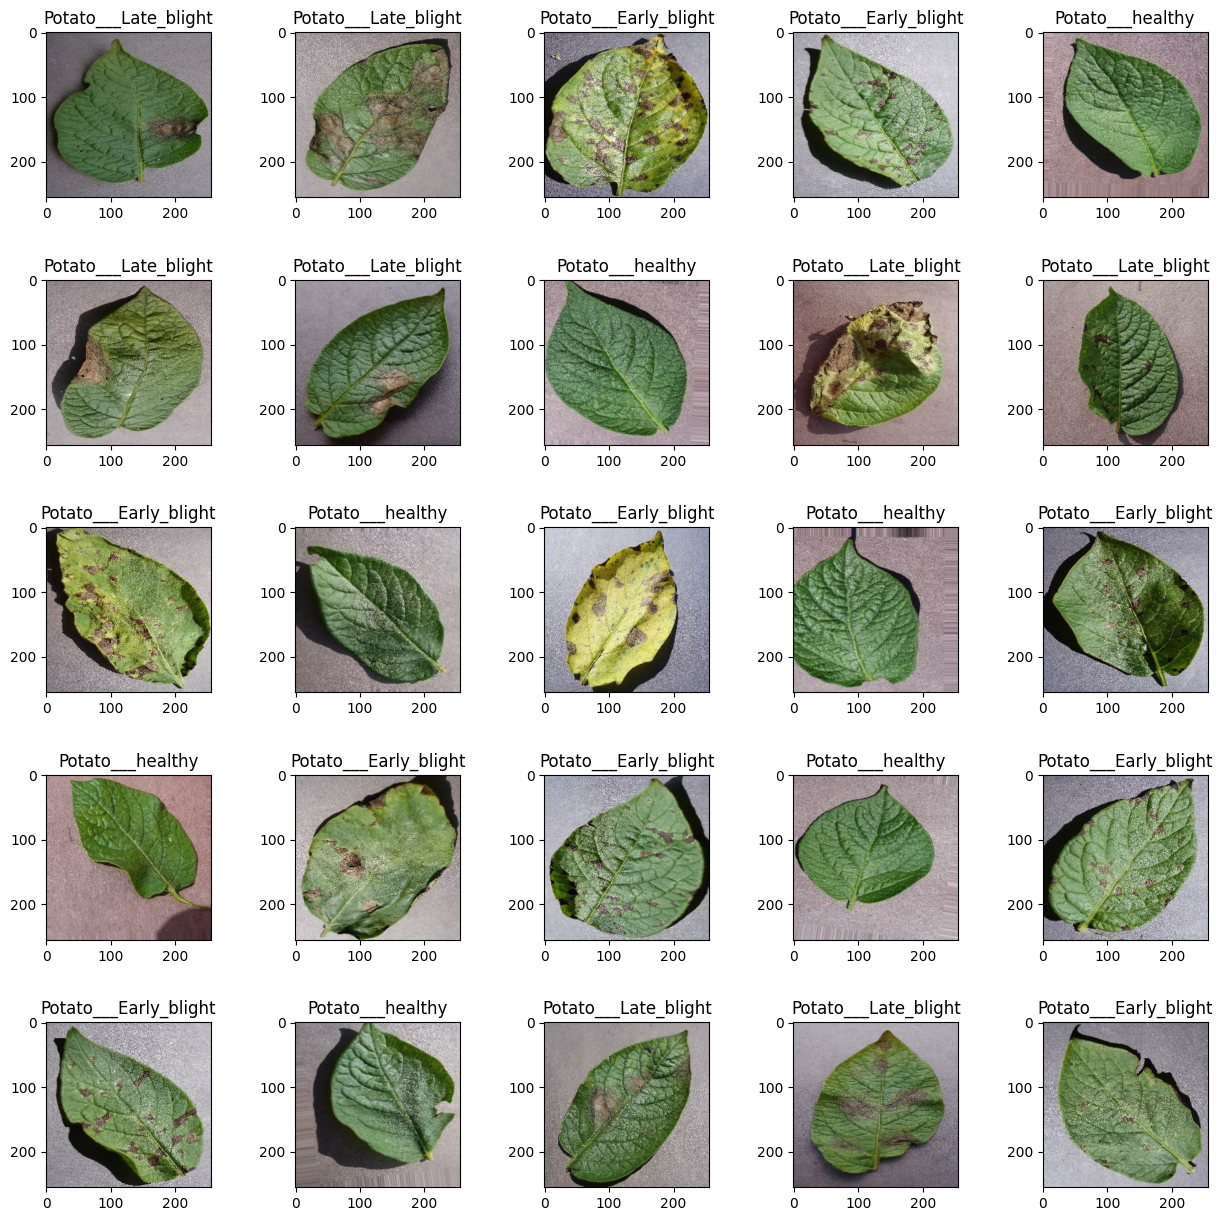

In [13]:
plt.figure(figsize=(15,15))
for image,label in data.take(1):
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))  # converts the values of the NumPy array to unsigned 8-bit integers (uint8)
    plt.title(class_name[label[i]])

  plt.subplots_adjust(hspace=0.5,wspace=0.5) ## if removed then no spacing between the image and next image's title
  plt.show()

In [14]:
path2 = "/content/Potato/Train"

In [15]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(path2,shuffle=True,image_size=(image_size,image_size),batch_size=32)

Found 900 files belonging to 3 classes.


In [16]:
path3 = "/content/Potato/Valid"

In [17]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(path3,shuffle = True,image_size=(image_size,image_size),batch_size =32)

Found 300 files belonging to 3 classes.


In [18]:
train = data
test = test_data
val = valid_data

In [19]:
# Cache - improves the performance of the dataset by avoiding redundant data loading operations.
# Shuffle - creates a buffer for shuffling elements to avoid biased attitude of model by not taking elements in the same order , also important for stochastic gradient descent
# prefetch - prefetch elements , AUTOTUNE dynamic arrangement of buffer size

train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
print(type(train))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [21]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3

In [24]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32,kernel_size = (3,3),activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),

])

model.build(input_shape = input_shape)
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [25]:
history = model.fit(train,epochs=30,batch_size=32,validation_data = val)

Epoch 1/30
29/29 [==============================] - 153s 5s/step - loss: 1.0013 - accuracy: 0.4778 - val_loss: 0.6078 - val_accuracy: 0.7067
Epoch 2/30
29/29 [==============================] - 201s 7s/step - loss: 0.5567 - accuracy: 0.7367 - val_loss: 0.4152 - val_accuracy: 0.8400
Epoch 3/30
29/29 [==============================] - 190s 7s/step - loss: 0.4692 - accuracy: 0.7822 - val_loss: 0.4434 - val_accuracy: 0.7933
Epoch 4/30
29/29 [==============================] - 152s 5s/step - loss: 0.4151 - accuracy: 0.8433 - val_loss: 0.3397 - val_accuracy: 0.8433
Epoch 5/30
29/29 [==============================] - 138s 5s/step - loss: 0.3503 - accuracy: 0.8533 - val_loss: 0.3101 - val_accuracy: 0.8633
Epoch 6/30
29/29 [==============================] - 138s 5s/step - loss: 0.2705 - accuracy: 0.8967 - val_loss: 0.3019 - val_accuracy: 0.8900
Epoch 7/30
29/29 [==============================] - 146s 5s/step - loss: 0.2045 - accuracy: 0.9267 - val_loss: 0.2138 - val_accuracy: 0.9033
Epoch 8/30
29

In [26]:
model.evaluate(test)

29/29 [==============================] - 37s 1s/step - loss: 2.9906e-04 - accuracy: 1.0000


[0.00029906322015449405, 1.0]

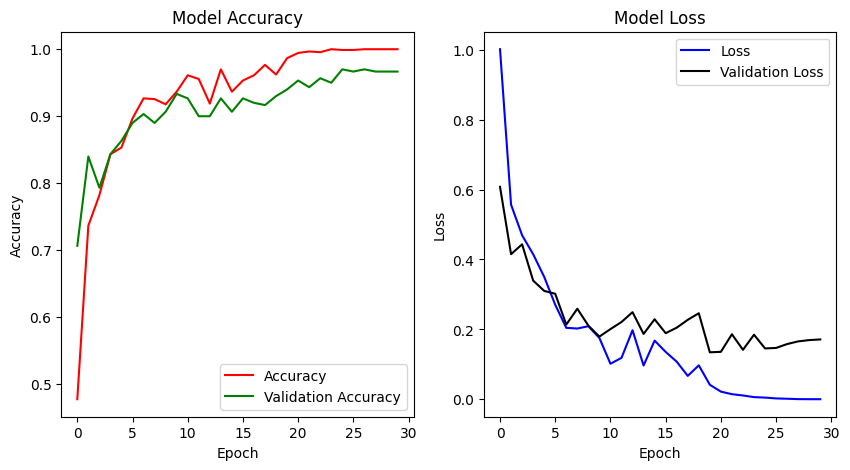

In [47]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

ax[0].plot(history.history['accuracy'],label='Accuracy',color = 'red')
ax[0].plot(history.history['val_accuracy'],label='Validation Accuracy',color = 'green')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc = 'best')

ax[1].plot(history.history['loss'],label = "Loss",color = "blue")
ax[1].plot(history.history['val_loss'],label = "Validation Loss", color="black")
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='best')

plt.show()

In [48]:
plt.figure(figsize=(20,20))
import numpy as np

for images, labels in test.take(1):
  predictions = model.predict(images)

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    actual_class = class_name[labels[i]]
    predicted_class = class_name[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])

    plt.title(f"Actual: {actual_class}\nPredicted : {predicted_class}\nConfidence : {confidence :.2f}")

    plt.axis("off")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [49]:
import joblib
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

model_version = 2
directory = "model"

os.makedirs(directory, exist_ok = True)

joblib.dump(model, f"{directory}/model_version_{model_version}.joblib")

['model/model_version_2.joblib']

In [50]:
loaded_model = joblib.load(f"{directory}/model_version_{model_version}.joblib")

29/29 [==============================] - 38s 1s/step


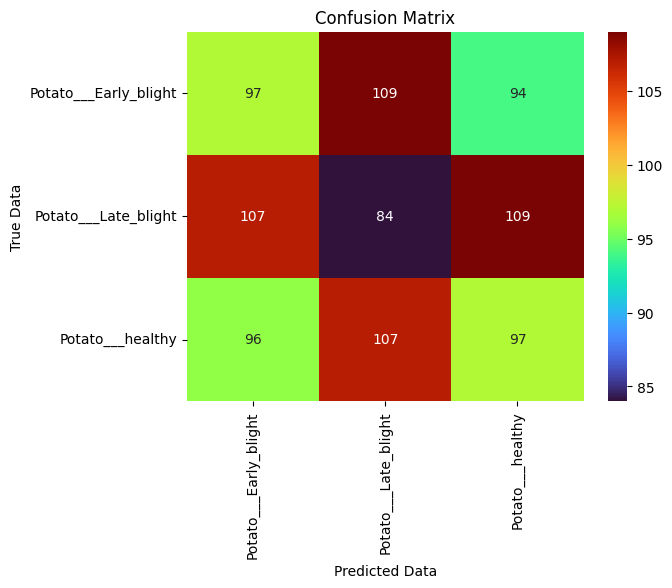

In [51]:
predictions = loaded_model.predict(test)
predict = np.argmax(predictions, axis=1)

true = np.concatenate([y for x, y in test], axis=0)
cm = confusion_matrix(true,predict)
sns.heatmap(cm,annot = True, fmt="d",cmap = "turbo",xticklabels = class_name,yticklabels = class_name)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Data")
plt.ylabel("True Data")
plt.show()

In [52]:
print(classification_report(true,predict,target_names = class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.32      0.32      0.32       300
 Potato___Late_blight       0.28      0.28      0.28       300
     Potato___healthy       0.32      0.32      0.32       300

             accuracy                           0.31       900
            macro avg       0.31      0.31      0.31       900
         weighted avg       0.31      0.31      0.31       900



In [53]:
!pip install scikit_plot

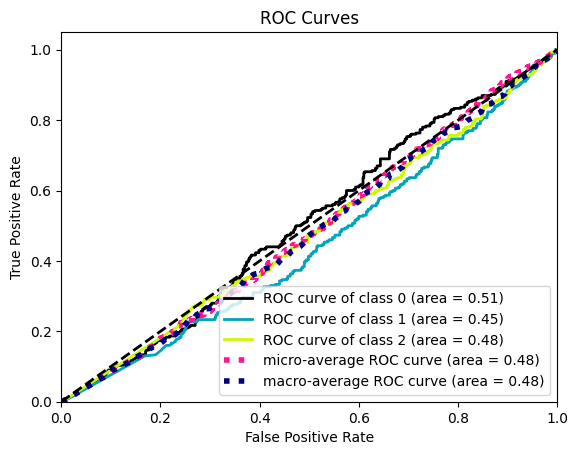

In [54]:
import scikitplot as skplt ## important as when installed it's scikit_plot but while importing it's scikitplot
skplt.metrics.plot_roc(true,predictions)
plt.show()

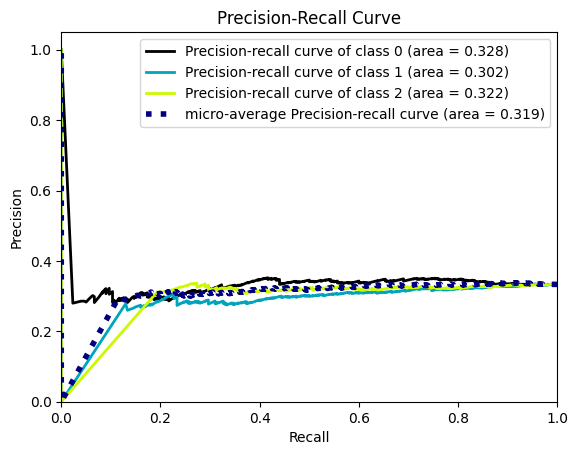

In [55]:
skplt.metrics.plot_precision_recall(true,predictions)
plt.show()

1/1 [==============================] - 0s 53ms/step


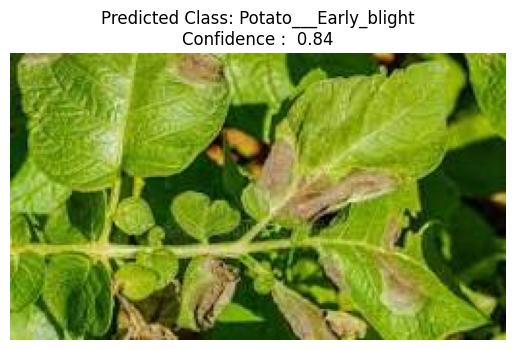

In [56]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests
from io import BytesIO

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkEY0UXJLItEspeP8APt232Uz8vS3SjYiAE4zJslJ-3Ro4n2SY1ghhDD_EWg&s"
response = requests.get(url)
img = cv2.imdecode(np.frombuffer(response.content,np.uint8),1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
custom_image = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
custom_image = np.expand_dims(custom_image,axis=0)
custom_image = custom_image/255.0
custom_prediction = model.predict(custom_image)
predicted_class = class_name[np.argmax(custom_prediction)]
confidence = np.max(custom_prediction)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}\nConfidence : {confidence : .2f}")
plt.axis("off")
plt.show()